In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import shutil
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import RandomizedPCA
from sklearn.cross_validation import train_test_split
import numpy as np
#from PIL import Image
#from PyImagePlot.montage_manager import *

/usr/lib64/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("../features/rural-ResNet50-pool.csv")

In [3]:
df.head()

,image_paths,pool5.0,pool5.1,pool5.2,pool5.3,pool5.4,pool5.5,pool5.6,pool5.7,pool5.8,...,pool5.2038,pool5.2039,pool5.2040,pool5.2041,pool5.2042,pool5.2043,pool5.2044,pool5.2045,pool5.2046,pool5.2047
0,/jupyter-nfs/data/Liberia/rural/southeast_tile...,0.137256,0.033329,0.243107,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.147094,0.000000,0.0
1,/jupyter-nfs/data/Liberia/rural/southeast_tile...,1.413542,0.016365,0.089910,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.284178,0.0,0.0,0.068741,0.0,0.0,0.0,0.000000,0.022701,0.0
2,/jupyter-nfs/data/Liberia/rural/southeast_tile...,0.106881,0.000000,0.070017,0.026601,0.009001,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.001180,0.0,0.0,0.0,0.132630,0.000000,0.0
3,/jupyter-nfs/data/Liberia/rural/southeast_tile...,0.405045,0.009956,0.000000,0.000000,0.045935,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.015846,0.000000,0.0
4,/jupyter-nfs/data/Liberia/rural/southeast_tile...,0.279609,0.000000,0.409207,0.000000,0.021985,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.003470,0.000000,0.0


In [4]:
images = df.iloc[:,0]

In [5]:
X = np.array(df.iloc[:,1:])


In [7]:
X.shape[0]*.1

7144.8

In [9]:
## samples look random enough so just split data into two
X_train = X[:10000,:] 
X_test = X[10000:,:]


In [14]:
km = KMeans(n_clusters=50, init='k-means++',n_init=500, max_iter=5000, random_state=0, n_jobs=-4)
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=5000,
    n_clusters=50, n_init=500, n_jobs=-4, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [15]:
# clustered_mumbai_train = km.predict(X_train)
# clustered_mumbai_test = km.predict(X_test)
# clustered_mumbai = km.predict(X_mumbai)
# clustered_test = km.predict(np.vstack((X_test, X_not_mumbai)))
# clustered_not_mumbai = km.predict(X_not_mumbai)

In [16]:
import collections

def make_counter_df(input_list):
    counters = collections.Counter(input_list)
    counters_df = pd.DataFrame.from_dict(counters, orient = 'index')
    return counters_df/counters_df.sum()

In [17]:
def organize_images(kmeans_imgs, features, image_paths):
    cluster_orders = RandomizedPCA(n_components=1).fit_transform(kmeans_imgs.cluster_centers_)
    clusters = km.transform(features)
    clusters_distances_ordered = clusters[:,list(np.argsort(list(cluster_orders), axis = 0).squeeze())]
    clusters_df = pd.DataFrame({"image_paths": image_paths, 'cluster': np.argmin(clusters_distances_ordered, axis = 1), 
        'dist': np.min(clusters_distances_ordered*10, axis = 1).astype(int)})
    
    #clusters_df[["image_paths", "cluster", "dist"]].to_csv(filename, index = False)
    #return np.argmin(clusters_distances_ordered, axis = 1)
    return clusters_df

In [20]:
clustered_train_ordered = organize_images(km, X_train, df.iloc[:10000,0])
clustered_test_ordered = organize_images(km, X_test, df.iloc[10000:,0])

/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
clustered_train_ordered.head()

,cluster,dist,image_paths
0,24,98,/jupyter-nfs/data/Liberia/rural/southeast_tile...
1,17,95,/jupyter-nfs/data/Liberia/rural/southeast_tile...
2,8,73,/jupyter-nfs/data/Liberia/rural/southeast_tile...
3,11,95,/jupyter-nfs/data/Liberia/rural/southeast_tile...
4,9,88,/jupyter-nfs/data/Liberia/rural/southeast_tile...


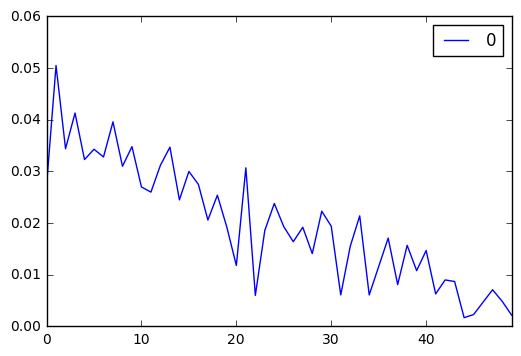

In [22]:
make_counter_df(clustered_train_ordered.cluster).plot()


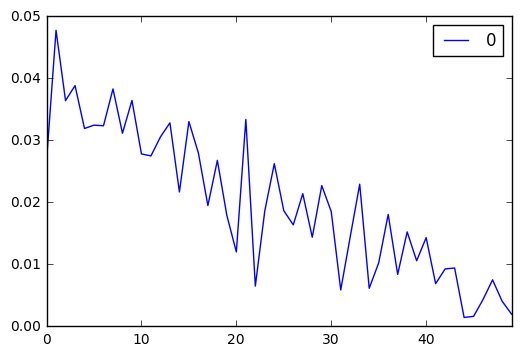

In [23]:
make_counter_df(clustered_test_ordered.cluster).plot()

In [14]:
clustered_train_ordered[["image_paths","cluster","dist"]].to_csv("../results/50_cluster_distributions_rural_train.csv", 
                                                                    index = False)
clustered_test_ordered[["image_paths","cluster","dist"]].to_csv("../results/50_cluster_distributions_rura_test.csv", 
                                                                    index = False)
